In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
### LOAD RANDOM CATALOG ###########################
# beta  = 1.0
# nrand = 1.0
# RandoCat name: 60.cat
# Obs. catalog: v300.dat --> v_circmax = 300 km/s

OBS_CAT = np.loadtxt("observed_catalogs/v300.dat")
RND_CAT = np.loadtxt("random_catalogs/60.cat")
#BETASKEL = np.loadtxt("xdl_beta_skeleton/60.BSKIndex")
#FULLCAT = np.loadtxt("full_catalogs/60.cat")
#VOIDPARTLIST = np.loadtxt("./masterlists/60.mls")

In [3]:
beta = 1.0
nrand = 1.0

z0 = 0      # Mpc/h
deltaz = 20 # Mpc/h

x_min, x_max = 0, 200
y_min, y_max = 0, 200

In [4]:
Xobs, Yobs, Zobs = OBS_CAT[:,0], OBS_CAT[:,1], OBS_CAT[:,2]

index_o = np.where( (abs(Zobs - z0)< deltaz/2.) &
                     (Xobs >= x_min) & (Xobs <= x_max) & 
                     (Yobs >= y_min) & (Yobs <= y_max))

x_o, y_o, z_o = Xobs[index_o], Yobs[index_o], Zobs[index_o]

Xrnd, Yrnd, Zrnd = RND_CAT[:,0], RND_CAT[:,1], RND_CAT[:,2]
index_r = np.where( (abs(Zrnd - z0)< deltaz/1.5) &
                     (Xrnd >= x_min) & (Xrnd <= x_max) & 
                     (Yrnd >= y_min) & (Yrnd <= y_max))

x_r, y_r, z_r = Xrnd[index_r], Yrnd[index_r], Zrnd[index_r]

In [5]:
zeros_o = np.zeros_like(z_o)
zeros_r = np.zeros_like(z_r)

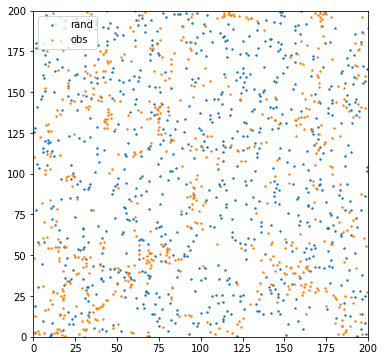

In [6]:
fig = plt.figure(figsize=(6,6))

plt.scatter(x_r, y_r, s = 2, label="rand")
plt.scatter(x_o, y_o, s = 2, label="obs")


plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc=2)

In [7]:
obs = np.vstack([x_o, y_o, zeros_o]).T
rnd = np.vstack([x_r, y_r, zeros_r]).T

fullcat = np.vstack([rnd,obs])

In [8]:
np.savetxt("explaining_the_method/observed.cat", obs)
np.savetxt("explaining_the_method/random.cat", rnd)
np.savetxt("explaining_the_method/fullcat.cat", fullcat)

Then, run the NGL library.

In [10]:
rnd.shape[0]/obs.shape[0]

1.2646592709984152

In [11]:
ML = np.loadtxt("explaining_the_method/masterlist.mls", delimiter=',',
                dtype=[('voidID', 'i8'), ('x', 'f8'), ('y', 'f8'), ('z', 'f8')] )

In [12]:
ML['voidID']

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,
        8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11

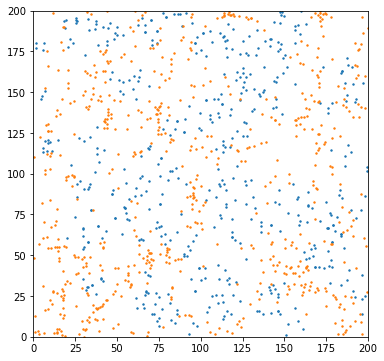

In [13]:
fig = plt.figure(figsize=(6,6))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)


plt.scatter(ML['x'], ML['y'], s=2)
plt.scatter(x_o, y_o, s=2)


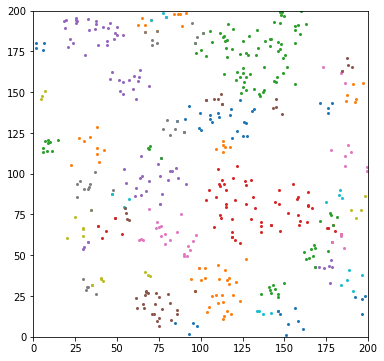

In [14]:
fig = plt.figure(figsize=(6,6))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.scatter(x_o, y_o, s=2, c="k")

for i in range(ML['voidID'][0], ML["voidID"][-1]+1):
    index = np.where(ML['voidID']==i)[0]
    plt.scatter(ML['x'][index], ML['y'][index], s=4)



In [16]:
FULLCAT = np.loadtxt("./explaining_the_method/fullcat.cat", delimiter=" ",
                     dtype=[("x", "f8"), ("y", "f8"), ("z", "f8")])

In [17]:
fcBSkel = np.loadtxt("./explaining_the_method/beta_skel.BSKIndex", delimiter=" ",
                     dtype=[("Origin", "i8"), ("End", "i8")])

In [18]:
N_random = x_r.shape[0]
N_halos = x_o.shape[0]

In [19]:
index_rr = np.where( (fcBSkel["Origin"] < N_random) & (fcBSkel["End"]  < N_random) )
index_oo = np.where( (fcBSkel["Origin"] >=N_random) & (fcBSkel["End"] >= N_random) )

In [20]:
fcBSkel[index_rr]["End"]

array([387, 611, 389, ..., 692, 723, 431])

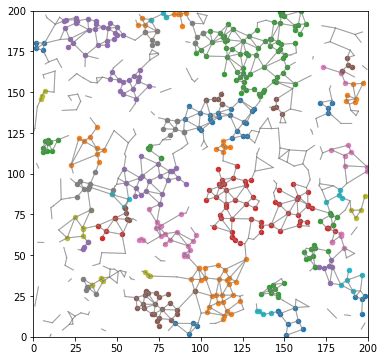

In [29]:
fig = plt.figure(figsize=(6,6))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.scatter(x_o, y_o, s=2, c="k")


for i in range(ML['voidID'][0], ML["voidID"][-1]+1):
    index = np.where(ML['voidID']==i)[0]
    plt.scatter(ML['x'][index], ML['y'][index], s=20)
       
for i in index_rr:
    plt.plot( [FULLCAT[fcBSkel[index_rr]["Origin"]]["x"], 
               FULLCAT[fcBSkel[index_rr]["End"]]["x"]], 
              [FULLCAT[fcBSkel[index_rr]["Origin"]]["y"], 
               FULLCAT[fcBSkel[index_rr]["End"]]["y"]], lw=1, c="gray", alpha=0.5)
 


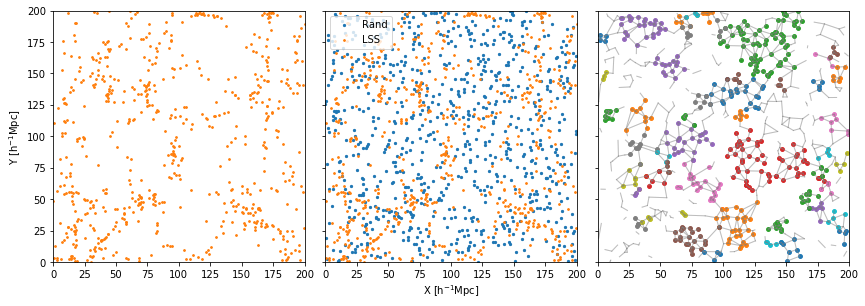

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharey=True)



ax[0].scatter(x_r, y_r, s = 0, label="random", alpha=0)
ax[0].scatter(x_o, y_o, s = 3, label="LSS")
ax[0].set_ylabel(r"Y [$\rm h^{-1} Mpc$]")


ax[1].scatter(x_r, y_r, s = 5, label="Rand")
ax[1].scatter(x_o, y_o, s = 3, label="LSS")
ax[1].legend(loc=2)
ax[1].set_xlabel(r"X [$\rm h^{-1} Mpc$]")

for i in range(ML['voidID'][0], ML["voidID"][-1]+1):
    index = np.where(ML['voidID']==i)[0]
    ax[2].scatter(ML['x'][index], ML['y'][index], s=15)

for i in index_rr:
    ax[2].plot( [FULLCAT[fcBSkel[index_rr]["Origin"]]["x"], 
               FULLCAT[fcBSkel[index_rr]["End"]]["x"]], 
              [FULLCAT[fcBSkel[index_rr]["Origin"]]["y"], 
               FULLCAT[fcBSkel[index_rr]["End"]]["y"]], lw=1, c="gray", alpha=0.3)


for i in range(3):
    ax[i].set_xlim(x_min, x_max)
    ax[i].set_ylim(y_min, y_max)
    ax[i].set(aspect=1)

plt.tight_layout(pad=0.5)
plt.savefig("./figures/explaining_the_method.pdf")